# **Assignment 7**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

### Describing Dataset

### Data Source Link

### Justification for Dataset Selection


# Data Exploration (EDA)
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### Importing Libraries

#### The first step is to import Pandas and NumPy libraries for data exploration, cleaning and manipulation.

In [1]:
import numpy as np
import pandas as pd
import datetime
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_path = 'resources/austin_tx_airbnb.csv'
airbnb_df = pd.read_csv(csv_path, encoding="utf-8")
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,319887.0,Quaint East Austin 2BR SXSW 2016,1640158,Jeremy,NaN,78702,30.25328,-97.72968,Entire home/apt,694,4,2,3/18/2015,0.02,1,0,0,NaN
1,319894.0,The Perfect Austin Modern Home,1640172,Gary,NaN,78724,30.28354,-97.64966,Entire home/apt,192,2,171,9/11/2022,1.34,2,156,36,NaN
2,46856014.0,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,NaN,78611,30.80862,-98.37400,Entire home/apt,194,2,88,8/28/2022,4.17,1,342,47,NaN
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,140,2,614,8/28/2022,3.73,1,311,43,NaN
4,321675.0,3/2 House w/ Pool in Barton Hills,1142525,James,NaN,78704,30.25104,-97.78973,Entire home/apt,500,1,13,10/4/2015,0.11,1,0,0,NaN


In [3]:
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
18332,19325414.0,Luxurious Marble Falls Condo - 1 bedroom/1bath...,100605868,Myka,NaN,78654,30.55294,-98.28544,Entire home/apt,129,2,16,8/24/2020,0.26,22,52,0,NaN
18333,14359515.0,"Marble Falls, TX, *2-Bedroom SN #1",10981379,NaN,NaN,78654,30.55161,-98.28574,Entire home/apt,273,1,17,8/16/2020,0.24,57,70,0,NaN
18334,19905275.0,Luxurious Marble Falls Condo -3bed/2bath,100605868,Myka,NaN,78654,30.55294,-98.28544,Entire home/apt,160,2,12,11/21/2018,0.20,22,73,0,NaN
18335,30589642.0,"Marble Falls, TX, *1-Bedroom Presidential Z #1",10981379,NaN,NaN,78654,30.55294,-98.28544,Entire home/apt,396,1,0,NaN,NaN,57,73,0,NaN
18336,19608834.0,Dog-Friendly Riverfront Cabin w/ Private Hot T...,1488733,Vacasa Texas,NaN,78676,29.97121,-98.12321,Entire home/apt,181,2,146,8/21/2022,2.33,26,357,19,NaN


In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18337 non-null  float64
 1   name                            18337 non-null  object 
 2   host_id                         18337 non-null  int64  
 3   host_name                       18218 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18337 non-null  int64  
 6   latitude                        18337 non-null  float64
 7   longitude                       18337 non-null  float64
 8   room_type                       18337 non-null  object 
 9   price                           18337 non-null  int64  
 10  minimum_nights                  18337 non-null  int64  
 11  number_of_reviews               18337 non-null  int64  
 12  last_review                     

In [5]:
airbnb_df.shape

(18337, 18)

In [6]:
airbnb_df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [7]:
for column in airbnb_df.columns:
    print(f"Column {column} has {airbnb_df[column].isnull().sum()} null values")

Column id has 0 null values
Column name has 0 null values
Column host_id has 0 null values
Column host_name has 119 null values
Column neighbourhood_group has 18337 null values
Column neighbourhood has 0 null values
Column latitude has 0 null values
Column longitude has 0 null values
Column room_type has 0 null values
Column price has 0 null values
Column minimum_nights has 0 null values
Column number_of_reviews has 0 null values
Column last_review has 3403 null values
Column reviews_per_month has 3403 null values
Column calculated_host_listings_count has 0 null values
Column availability_365 has 0 null values
Column number_of_reviews_ltm has 0 null values
Column license has 18337 null values


In [8]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [9]:
missing_values_table(airbnb_df)

Your selected dataframe has 18 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
neighbourhood_group,18337,100.0
license,18337,100.0
last_review,3403,18.6
reviews_per_month,3403,18.6
host_name,119,0.6


In [10]:
airbnb_df['last_review'].value_counts()

9/5/2022      1193
9/11/2022      866
8/28/2022      651
9/4/2022       522
8/21/2022      479
              ... 
9/13/2020        1
9/9/2021         1
12/13/2017       1
6/2/2019         1
9/24/2015        1
Name: last_review, Length: 1376, dtype: int64

In [11]:
airbnb_df['last_review'].values.tolist()

['3/18/2015',
 '9/11/2022',
 '8/28/2022',
 '8/28/2022',
 '10/4/2015',
 '8/16/2022',
 '3/13/2014',
 '3/25/2018',
 '8/14/2022',
 '7/15/2022',
 '9/9/2022',
 '10/25/2019',
 '11/13/2021',
 '9/29/2019',
 nan,
 '3/27/2022',
 '4/29/2022',
 '9/11/2022',
 '1/10/2021',
 '6/13/2022',
 '8/7/2022',
 '5/24/2020',
 '3/13/2020',
 '6/17/2022',
 '3/8/2020',
 '8/25/2022',
 '4/25/2022',
 '2/16/2020',
 nan,
 '1/19/2022',
 '8/15/2022',
 '8/15/2022',
 '6/5/2022',
 '4/29/2022',
 '8/21/2022',
 '3/19/2018',
 '9/9/2022',
 '9/8/2022',
 '3/17/2013',
 '2/28/2020',
 '4/23/2018',
 '1/15/2022',
 '3/8/2022',
 '10/25/2021',
 '10/6/2015',
 '9/11/2022',
 nan,
 nan,
 '12/30/2021',
 '7/6/2022',
 '9/11/2022',
 '3/12/2022',
 '3/17/2019',
 '8/13/2022',
 nan,
 '9/11/2022',
 '4/6/2018',
 nan,
 '8/13/2022',
 '8/26/2022',
 '9/11/2022',
 '3/11/2020',
 '2/13/2020',
 '11/14/2021',
 '9/1/2022',
 '9/11/2022',
 '7/17/2022',
 nan,
 '5/9/2022',
 '8/21/2022',
 '8/22/2022',
 '11/3/2019',
 '9/12/2022',
 '5/22/2022',
 '9/5/2022',
 '9/6/2022',


In [12]:
airbnb_df['reviews_per_month'].value_counts()

1.00     377
0.02     241
0.03     185
0.01     185
0.04     173
        ... 
6.68       1
8.81       1
23.28      1
7.89       1
8.82       1
Name: reviews_per_month, Length: 855, dtype: int64

In [13]:
airbnb_df['host_name'].value_counts()

Vacasa Texas                    460
WanderJaunt                     196
Hill Country Premier Lodging    186
Evolve                          180
Landing                         145
                               ... 
Yami                              1
Chandler                          1
Zoel                              1
Dorothy And Marty                 1
Estefania                         1
Name: host_name, Length: 3858, dtype: int64

In [14]:
for c in airbnb_df.columns:
    print("---- %s ---" % c)
    print(airbnb_df[c].value_counts())

---- id ---
6.816090e+17    11
5.651430e+17    11
5.945390e+17    10
6.816080e+17    10
6.500130e+17     9
                ..
2.691457e+07     1
1.344892e+07     1
3.179993e+07     1
2.901164e+07     1
6.102400e+17     1
Name: id, Length: 18011, dtype: int64
---- name ---
Club Wyndham Austin, Texas, 1 Bedroom Deluxe Suite    17
The Bindel l Domain l Professionally Managed          13
CW Austin | 1BR/1BA King Bed Suite                    10
CW Austin Resort | 2BR/2BA King Bed Suite              9
Austin Studio                                          8
                                                      ..
Pet-Friendly Townhome ~ 2 Mi to Town Square!           1
Juanita's House on North Main                          1
Modern Blue House on Hip East Side--3 Bed/3.5 Bath     1
House w/ Hot Tub Near the Airport and F1               1
Lake Travis Luxury 5bd/3bath Cabin Hollows Resort      1
Name: name, Length: 17971, dtype: int64
---- host_id ---
26497220     207
104309976    196
107378253

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

### Create a subset of your original data and perform the following:

In [15]:
new_df = airbnb_df.iloc[0:18330]

In [16]:
new_df.shape

(18330, 18)

### 1- Modify multiple column names.

In [17]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [18]:
new_df.rename(columns = {'name':'specifications', 'calculated_host_listings_count':'listings_count', 'availability_365': 'availability_days'}, inplace = True)

In [19]:
new_df.columns

Index(['id', 'specifications', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings_count', 'availability_days',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

### 2- Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

In [20]:
new_df['last_review'].values.tolist()

['3/18/2015',
 '9/11/2022',
 '8/28/2022',
 '8/28/2022',
 '10/4/2015',
 '8/16/2022',
 '3/13/2014',
 '3/25/2018',
 '8/14/2022',
 '7/15/2022',
 '9/9/2022',
 '10/25/2019',
 '11/13/2021',
 '9/29/2019',
 nan,
 '3/27/2022',
 '4/29/2022',
 '9/11/2022',
 '1/10/2021',
 '6/13/2022',
 '8/7/2022',
 '5/24/2020',
 '3/13/2020',
 '6/17/2022',
 '3/8/2020',
 '8/25/2022',
 '4/25/2022',
 '2/16/2020',
 nan,
 '1/19/2022',
 '8/15/2022',
 '8/15/2022',
 '6/5/2022',
 '4/29/2022',
 '8/21/2022',
 '3/19/2018',
 '9/9/2022',
 '9/8/2022',
 '3/17/2013',
 '2/28/2020',
 '4/23/2018',
 '1/15/2022',
 '3/8/2022',
 '10/25/2021',
 '10/6/2015',
 '9/11/2022',
 nan,
 nan,
 '12/30/2021',
 '7/6/2022',
 '9/11/2022',
 '3/12/2022',
 '3/17/2019',
 '8/13/2022',
 nan,
 '9/11/2022',
 '4/6/2018',
 nan,
 '8/13/2022',
 '8/26/2022',
 '9/11/2022',
 '3/11/2020',
 '2/13/2020',
 '11/14/2021',
 '9/1/2022',
 '9/11/2022',
 '7/17/2022',
 nan,
 '5/9/2022',
 '8/21/2022',
 '8/22/2022',
 '11/3/2019',
 '9/12/2022',
 '5/22/2022',
 '9/5/2022',
 '9/6/2022',


In [21]:
new_df["last_review"] = pd.to_datetime(new_df["last_review"])

In [22]:
new_df.head()

,id,specifications,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,license
0,319887.0,Quaint East Austin 2BR SXSW 2016,1640158,Jeremy,NaN,78702,30.25328,-97.72968,Entire home/apt,694,4,2,2015-03-18,0.02,1,0,0,NaN
1,319894.0,The Perfect Austin Modern Home,1640172,Gary,NaN,78724,30.28354,-97.64966,Entire home/apt,192,2,171,2022-09-11,1.34,2,156,36,NaN
2,46856014.0,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,NaN,78611,30.80862,-98.37400,Entire home/apt,194,2,88,2022-08-28,4.17,1,342,47,NaN
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,NaN
4,321675.0,3/2 House w/ Pool in Barton Hills,1142525,James,NaN,78704,30.25104,-97.78973,Entire home/apt,500,1,13,2015-10-04,0.11,1,0,0,NaN


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18330 non-null  float64       
 1   specifications         18330 non-null  object        
 2   host_id                18330 non-null  int64         
 3   host_name              18213 non-null  object        
 4   neighbourhood_group    0 non-null      float64       
 5   neighbourhood          18330 non-null  int64         
 6   latitude               18330 non-null  float64       
 7   longitude              18330 non-null  float64       
 8   room_type              18330 non-null  object        
 9   price                  18330 non-null  int64         
 10  minimum_nights         18330 non-null  int64         
 11  number_of_reviews      18330 non-null  int64         
 12  last_review            14928 non-null  datetime64[ns]
 13  r

### 3- Fix missing and invalid values in data.

In [24]:
new_df['last_review'] = pd.to_datetime(new_df['last_review']).dt.date

In [25]:
new_df[['last_review']] = new_df[['last_review']].fillna('0000-00-00')

In [26]:
new_df[['host_name']] = new_df[['host_name']].fillna('unknown')


In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18330 non-null  float64
 1   specifications         18330 non-null  object 
 2   host_id                18330 non-null  int64  
 3   host_name              18330 non-null  object 
 4   neighbourhood_group    0 non-null      float64
 5   neighbourhood          18330 non-null  int64  
 6   latitude               18330 non-null  float64
 7   longitude              18330 non-null  float64
 8   room_type              18330 non-null  object 
 9   price                  18330 non-null  int64  
 10  minimum_nights         18330 non-null  int64  
 11  number_of_reviews      18330 non-null  int64  
 12  last_review            18330 non-null  object 
 13  reviews_per_month      14928 non-null  float64
 14  listings_count         18330 non-null  int64  
 15  av

In [28]:
new_df['reviews_per_month'] = new_df['reviews_per_month'].fillna(0)

In [29]:
new_df['last_review'].isnull().sum()

0

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18330 non-null  float64
 1   specifications         18330 non-null  object 
 2   host_id                18330 non-null  int64  
 3   host_name              18330 non-null  object 
 4   neighbourhood_group    0 non-null      float64
 5   neighbourhood          18330 non-null  int64  
 6   latitude               18330 non-null  float64
 7   longitude              18330 non-null  float64
 8   room_type              18330 non-null  object 
 9   price                  18330 non-null  int64  
 10  minimum_nights         18330 non-null  int64  
 11  number_of_reviews      18330 non-null  int64  
 12  last_review            18330 non-null  object 
 13  reviews_per_month      18330 non-null  float64
 14  listings_count         18330 non-null  int64  
 15  av

### 4- Create new columns based on existing columns or calculations.

In [31]:
new_df['monthly_reviews'] = new_df['reviews_per_month'].apply(np.ceil)


In [32]:
new_df['monthly_reviews'] = new_df['monthly_reviews'].round(0).astype('int64')

In [33]:
new_df['availibility_status'] = ["not_available" if x == 0 else "available" for x in new_df['availability_days']]

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18330 non-null  float64
 1   specifications         18330 non-null  object 
 2   host_id                18330 non-null  int64  
 3   host_name              18330 non-null  object 
 4   neighbourhood_group    0 non-null      float64
 5   neighbourhood          18330 non-null  int64  
 6   latitude               18330 non-null  float64
 7   longitude              18330 non-null  float64
 8   room_type              18330 non-null  object 
 9   price                  18330 non-null  int64  
 10  minimum_nights         18330 non-null  int64  
 11  number_of_reviews      18330 non-null  int64  
 12  last_review            18330 non-null  object 
 13  reviews_per_month      18330 non-null  float64
 14  listings_count         18330 non-null  int64  
 15  av

### 5- Drop column(s) from your dataset.

In [35]:
new_df = new_df.drop(["neighbourhood_group", "license"], axis=1)

In [36]:
new_df.columns

Index(['id', 'specifications', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'listings_count', 'availability_days', 'number_of_reviews_ltm',
       'monthly_reviews', 'availibility_status'],
      dtype='object')

### 6- Drop a row(s) from your dataset.

In [37]:
new_df.drop([0, 1])

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status
2,4.685601e+07,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,78611,30.80862,-98.37400,Entire home/apt,194,2,88,2022-08-28,4.17,1,342,47,5,available
3,5.456000e+03,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,4,available
4,3.216750e+05,3/2 House w/ Pool in Barton Hills,1142525,James,78704,30.25104,-97.78973,Entire home/apt,500,1,13,2015-10-04,0.11,1,0,0,1,not_available
5,5.769000e+03,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,41,1,269,2022-08-16,1.78,1,3,5,2,available
6,6.622450e+05,2B/2B Condo in Downtown Austin,3343870,Brandon,78703,30.26869,-97.75165,Entire home/apt,493,5,2,2014-03-13,0.02,1,0,0,1,not_available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18325,5.994570e+17,Marble Falls 3bdr Condo,451860097,Danielle,78654,30.55161,-98.28529,Entire home/apt,169,2,0,0000-00-00,0.00,8,73,0,0,available
18326,5.922870e+17,Escape to Lake Travis,15763079,Meg,78645,30.42382,-98.02781,Private room,70,2,0,0000-00-00,0.00,4,0,0,0,not_available
18327,6.558600e+17,The Aquarium Downstairs Apartment with King Bed,434036377,Amelia,78666,29.88104,-97.94400,Entire home/apt,250,2,2,2022-07-17,0.91,5,1,2,1,available
18328,6.556800e+17,Cheerful 2 Bedroom Home with Yoga Studio & Office,5330559,David,78664,30.48185,-97.65408,Entire home/apt,139,2,9,2022-08-27,3.75,1,0,9,4,not_available


In [38]:
new_df.shape

(18330, 18)

### 7- Sort your data based on multiple variables.

In [39]:
new_df = new_df.sort_values(['id', 'last_review'],
              ascending = [True, True]) 

In [40]:
new_df.head()

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,4,available
5,5769.0,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,41,1,269,2022-08-16,1.78,1,3,5,2,available
9,6413.0,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,62,30,119,2022-07-15,0.77,1,0,2,1,not_available
10,6448.0,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,149,3,288,2022-09-09,2.15,1,149,37,3,available
12,8502.0,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,44,3,48,2021-11-13,0.31,1,7,2,1,available


### 8- Filter your data based on some condition.

In [41]:
filter_df = new_df[new_df["room_type"].str.contains("Entire home/apt")]
filter_df.head()

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,4,available
9,6413.0,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,62,30,119,2022-07-15,0.77,1,0,2,1,not_available
10,6448.0,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,149,3,288,2022-09-09,2.15,1,149,37,3,available
12,8502.0,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,44,3,48,2021-11-13,0.31,1,7,2,1,available
16,13035.0,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,Entire home/apt,140,30,16,2022-04-29,0.11,2,183,4,1,available


### 9- Convert all the string values to upper or lower cases in one column.

In [42]:
filter_df['room_type'] = filter_df['room_type'].str.upper()
filter_df.head()

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,ENTIRE HOME/APT,140,2,614,2022-08-28,3.73,1,311,43,4,available
9,6413.0,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,ENTIRE HOME/APT,62,30,119,2022-07-15,0.77,1,0,2,1,not_available
10,6448.0,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,ENTIRE HOME/APT,149,3,288,2022-09-09,2.15,1,149,37,3,available
12,8502.0,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,ENTIRE HOME/APT,44,3,48,2021-11-13,0.31,1,7,2,1,available
16,13035.0,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,ENTIRE HOME/APT,140,30,16,2022-04-29,0.11,2,183,4,1,available


### 10- Check whether numeric values are present in a given column of your dataframe.

In [43]:
# creating bool series with new column
filter_df['specifications_numeric'] = list(map(lambda x: x.isdigit(), filter_df['specifications']))
filter_df.head()

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status,specifications_numeric
3,5456.0,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,ENTIRE HOME/APT,140,2,614,2022-08-28,3.73,1,311,43,4,available,False
9,6413.0,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,ENTIRE HOME/APT,62,30,119,2022-07-15,0.77,1,0,2,1,not_available,False
10,6448.0,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,ENTIRE HOME/APT,149,3,288,2022-09-09,2.15,1,149,37,3,available,False
12,8502.0,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,ENTIRE HOME/APT,44,3,48,2021-11-13,0.31,1,7,2,1,available,False
16,13035.0,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,ENTIRE HOME/APT,140,30,16,2022-04-29,0.11,2,183,4,1,available,False


### 11- Group your dataset by one column, and get the mean, min, and max values by group.

In [44]:
result_df = new_df.groupby('room_type').agg({'price': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of room price are:")
print(result_df)

Mean, min, and max values of room price are:
                      price           
                       mean min    max
room_type                             
Entire home/apt  436.371825   1  23000
Hotel room       313.583333   0   3004
Private room     120.065430   5  10000
Shared room       67.165414  15    700


### 12- Group your dataset by two columns and then sort the aggregated results within the groups.

In [101]:
df = new_df.groupby(['room_type'])['price'].mean().sort_values(ascending=False).head(2)
df

room_type
Entire home/apt    436.371825
Hotel room         313.583333
Name: price, dtype: float64

In [102]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [103]:
missing_values_table(new_df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Summary statistics means, medians, quartiles

In [104]:
new_df.describe()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews
count,1.833000e+04,1.833000e+04,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000
mean,1.697470e+17,1.356883e+08,78697.203110,30.295382,-97.806859,380.360284,6.620022,35.408402,1.356762,17.412821,169.779651,11.538352,1.805074
std,2.810990e+17,1.416007e+08,98.749257,0.152987,0.187524,1115.693815,23.326103,71.070039,1.734411,41.276050,138.734835,18.353477,1.788942
min,5.456000e+03,2.300000e+01,76530.000000,29.674790,-98.606320,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.369825e+07,1.969290e+07,78669.000000,30.237835,-97.823850,100.000000,1.000000,1.000000,0.070000,1.000000,29.000000,0.000000,1.000000
50%,4.651107e+07,8.174628e+07,78704.000000,30.272260,-97.747755,169.000000,2.000000,9.000000,0.745000,2.000000,155.500000,4.000000,1.000000
75%,5.573428e+17,2.195006e+08,78739.000000,30.360775,-97.717181,296.000000,3.000000,36.000000,2.000000,9.000000,324.000000,16.000000,2.000000
max,7.140330e+17,4.790769e+08,78759.000000,31.042608,-97.186290,23000.000000,1100.000000,1062.000000,35.180000,207.000000,365.000000,316.000000,36.000000


In [105]:
new_df.isnull().sum()
new_df.dropna(how='any',inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18330 entries, 3 to 13049
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18330 non-null  float64
 1   specifications         18330 non-null  object 
 2   host_id                18330 non-null  int64  
 3   host_name              18330 non-null  object 
 4   neighbourhood          18330 non-null  int64  
 5   latitude               18330 non-null  float64
 6   longitude              18330 non-null  float64
 7   room_type              18330 non-null  object 
 8   price                  18330 non-null  int64  
 9   minimum_nights         18330 non-null  int64  
 10  number_of_reviews      18330 non-null  int64  
 11  last_review            18330 non-null  object 
 12  reviews_per_month      18330 non-null  float64
 13  listings_count         18330 non-null  int64  
 14  availability_days      18330 non-null  int64  
 15  nu

In [106]:
new_df.duplicated().sum()
new_df.drop_duplicates(inplace=True)
new_df

,id,specifications,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_count,availability_days,number_of_reviews_ltm,monthly_reviews,availibility_status
3,5.456000e+03,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,4,available
5,5.769000e+03,NW Austin Room,8186,Elizabeth,78729,30.456970,-97.784220,Private room,41,1,269,2022-08-16,1.78,1,3,5,2,available
9,6.413000e+03,Gem of a Studio near Downtown,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,62,30,119,2022-07-15,0.77,1,0,2,1,not_available
10,6.448000e+03,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.260340,-97.764870,Entire home/apt,149,3,288,2022-09-09,2.15,1,149,37,3,available
12,8.502000e+03,Woodland Studio Lodging,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,44,3,48,2021-11-13,0.31,1,7,2,1,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16874,7.137080e+17,Private Apt in Ranch House. 20 Minutes from ATX,479076909,Spike,78617,30.198370,-97.545140,Entire home/apt,125,1,0,0000-00-00,0.00,1,347,0,0,available
13040,7.137890e+17,Luxe Chic 1BR suite close to DT and Domain w/ gym,35817561,Jen And Steven,78723,30.316788,-97.701656,Entire home/apt,76,1,0,0000-00-00,0.00,74,361,0,0,available
13041,7.138200e+17,Jaw-Dropping Natiivo Condo | Rainey | Rooftop ...,444781528,Jason,78701,30.256454,-97.738827,Entire home/apt,117,1,0,0000-00-00,0.00,11,365,0,0,available
17456,7.139830e+17,New Listing! The Garden House,470866277,RedAwning,78613,30.501600,-97.834800,Entire home/apt,310,1,0,0000-00-00,0.00,1,328,0,0,available


In [ ]:
help()


Welcome to Python 3.6's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.6/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".



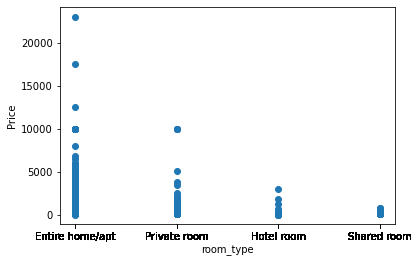

In [52]:
# Generate a scatter plot 
room_type = new_df.iloc[:,7]
price = new_df.iloc[:,8]
plt.scatter(room_type,price)
plt.xticks(room_type)
plt.xlabel('room_type')
plt.ylabel('Price')
plt.show()

In [ ]:
# plotting a bar graph
new_df.plot(x="room_type", y="price", kind="bar")


In [ ]:
# plotting a pie chart
plt.pie(df["price"], labels=df["room_type"])
plt.show()

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?